# Final Group Project: Predict Life expectancy

**Project Info:**
- The dataset is getting from __[Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)__
- Contributors
    - Priyanka
    - Rohit
    - Grant

## Data Pre-Processing

### Load Data
Load from the data stored in **Github repository** so that each team member can directly run the code.<br>
__[Tutorial: How to read a CSV file from GitHub on Jupyter Notebook](https://www.youtube.com/watch?v=4xXBDXDSFts)__

In [5]:
# imort library
import pandas as pd

In [6]:
# Load data: load file from github repository
data = pd.read_csv('https://raw.githubusercontent.com/GrantCa24/DA_Group6-Final_Project/main/data_raw/Life%20Expectancy%20Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Assessment

**Highlights:**
- There are 2938 rows, 22 columns.
- Remove leading and trailing characters.
    - __[`Series.str.strip()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html)__
- Rename column name
    - Base on the discussion as the link here: __[1-19 years: typo in the column header](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/276334)__ we decided to rename the header name.
- No duplicate.
- Data integrity (Outliers): Several columns has max value which does not make sense.

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 10-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

In [10]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
# Remove spaces at the beginning and at the end of the headers(string)
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [12]:
# Rename column 1-19 years to 10-19 years
data.rename(columns={'thinness 1-19 years': 'thinness 10-19 years'}, inplace=True) # modify the DataFrame

In [13]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
# Check the total of rows and columns)
rows, columns = data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 2938, Columns: 22


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Check Duplicates

There is **no duplicate** need to handle.

In [18]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


### Check Null values in all the columns and rows
<br> ⚠️**Null values will be deal with in pipeline with model building**
- Imputation is more proper to be done in pipeline in case of data leakage (misleading information)
    - Example: If we calculate the mean using the entire dataset (both training and test sets), **the test set information is indirectly being used to train the model**. This can lead to an overestimation of the model's performance.

In [20]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [21]:
missing_percentage = missing_values * 100 / len(data)
print(missing_percentage)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<class 'method'>


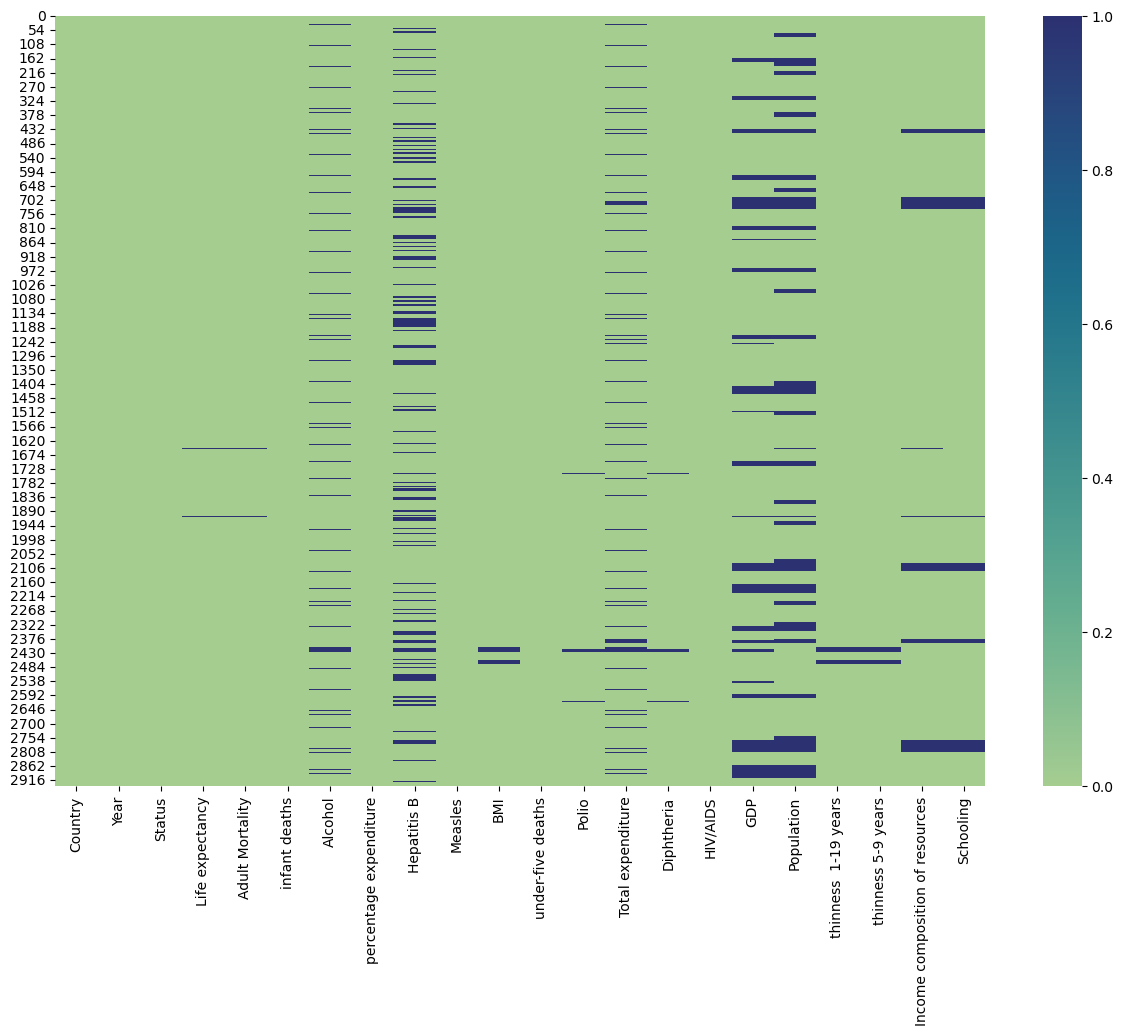

In [23]:
print(type(data.isnull))
#visual representation of missing values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cmap = 'crest')
plt.show()

### Check and remove outliers

__[Warning from the discussion](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/161872)__
- The maximum infant death number (per 1000 population) is 1800
    - replace those > 1000 with null
- The maximum number of reported Measles cases per 1000 population is 212183
    - replace those > 1000 with null
- The maximum number of under-five deaths per 1000 population is 2500
    - replace those > 1000 with null
- The minimum population of the country is 34
    - drop the population < 50 which are not consistence through out the year.

In [26]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### per 1000 population: Replace > 1000 with Null

In [28]:
# value of infant deaths, Measles, and under-five deaths should be <= 1000
cols = ["infant deaths", "Measles", "under-five deaths"]

import numpy as np
# Single label for row and column: df.loc['row', 'column']
for col in cols:
    data.loc[data[col]>1000, col] = np.nan # Selects the rows in column col where the condition data[col] > 1000 is True, then replace it with Null

In [29]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2925.000000,2744.000000,2938.000000,2385.000000,2413.000000,2904.000000,2922.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,23.942906,4.602861,738.251295,80.940461,88.976378,38.321247,32.341205,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,67.557336,4.052413,1987.914858,25.070016,186.937609,20.044034,87.456561,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,4.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,21.000000,7.702500,441.534144,97.000000,66.000000,56.200000,26.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1000.000000,17.870000,19479.911610,99.000000,999.000000,87.300000,943.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### minimum population: Drop observations that population < 50 (consistency with the year trend)

In [31]:
data.loc[data['Population'] < 50]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
985,Georgia,2008,Developing,73.9,128.0,1.0,7.17,151.762567,89.0,56.0,...,9.0,8.99,92.0,0.1,3174.949100,43.0,2.6,2.8,0.735,13.1
1603,Maldives,2014,Developing,78.2,62.0,0.0,0.01,2051.748615,99.0,0.0,...,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
1608,Maldives,2009,Developing,76.3,75.0,0.0,1.59,100.503021,98.0,6.0,...,98.0,9.22,98.0,0.1,597.165900,36.0,14.1,14.2,0.651,11.8
1614,Maldives,2003,Developing,72.7,112.0,0.0,1.75,491.497891,98.0,75.0,...,98.0,5.90,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8


In [32]:
data[data['Country'] == 'Georgia']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
978,Georgia,2015,Developing,74.4,129.0,1.0,NaN,0.000000,94.0,431.0,...,91.0,NaN,94.0,0.1,3764.649120,37171.0,2.7,2.8,0.768,13.9
979,Georgia,2014,Developing,74.5,125.0,1.0,6.13,221.482875,91.0,NaN,...,91.0,7.42,91.0,0.1,4429.657500,3727.0,2.7,2.8,0.759,13.5
980,Georgia,2013,Developing,74.5,128.0,1.0,5.91,180.378703,96.0,NaN,...,94.0,7.25,93.0,0.1,4274.376857,3776.0,2.7,2.8,0.755,13.5
981,Georgia,2012,Developing,74.2,13.0,1.0,7.71,158.257602,92.0,31.0,...,93.0,8.57,92.0,0.1,4142.869175,3825.0,2.6,2.8,0.749,13.4
982,Georgia,2011,Developing,73.9,127.0,1.0,8.14,198.948760,89.0,64.0,...,88.0,9.38,94.0,0.1,3725.632210,3875.0,2.6,2.8,0.742,13.3
983,Georgia,2010,Developing,73.8,132.0,1.0,7.24,194.173266,95.0,22.0,...,88.0,1.50,92.0,0.1,2964.477340,3926.0,2.6,2.8,0.738,13.3
984,Georgia,2009,Developing,73.2,133.0,1.0,6.66,18.531430,54.0,23.0,...,93.0,1.19,88.0,0.1,276.588512,3978.0,2.6,2.8,0.734,12.8
985,Georgia,2008,Developing,73.9,128.0,1.0,7.17,151.762567,89.0,56.0,...,9.0,8.99,92.0,0.1,3174.949100,43.0,2.6,2.8,0.735,13.1
986,Georgia,2007,Developing,74.4,12.0,1.0,8.65,106.164686,94.0,44.0,...,88.0,8.17,98.0,0.1,2492.128780,482.0,2.7,2.9,0.722,12.5
987,Georgia,2006,Developing,73.9,126.0,1.0,6.18,110.113829,84.0,334.0,...,89.0,8.39,88.0,0.1,1872.684160,4136.0,2.7,2.9,0.714,12.6


In [33]:
data[data['Country'] == 'Maldives']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1602,Maldives,2015,Developing,78.5,61.0,0.0,NaN,0.000000,99.0,0.0,...,99.0,NaN,99.0,0.1,8395.785198,49163.0,13.6,13.6,0.701,12.7
1603,Maldives,2014,Developing,78.2,62.0,0.0,0.01,2051.748615,99.0,0.0,...,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
1604,Maldives,2013,Developing,77.9,64.0,0.0,0.01,1626.591186,99.0,0.0,...,99.0,11.16,99.0,0.1,7112.335750,393.0,13.7,13.8,0.683,12.4
1605,Maldives,2012,Developing,77.6,65.0,0.0,0.01,1259.940376,99.0,0.0,...,99.0,9.16,99.0,0.1,6541.746500,385.0,13.8,13.9,0.675,12.1
1606,Maldives,2011,Developing,77.3,67.0,0.0,1.92,1079.893546,96.0,0.0,...,96.0,8.11,96.0,0.1,6497.554430,377.0,13.9,14.0,0.663,11.8
1607,Maldives,2010,Developing,76.7,73.0,0.0,1.83,91.139718,97.0,0.0,...,97.0,7.93,96.0,0.1,633.794980,367.0,14.0,14.1,0.653,11.6
1608,Maldives,2009,Developing,76.3,75.0,0.0,1.59,100.503021,98.0,6.0,...,98.0,9.22,98.0,0.1,597.165900,36.0,14.1,14.2,0.651,11.8
1609,Maldives,2008,Developing,75.9,81.0,0.0,1.76,1077.712092,98.0,0.0,...,98.0,9.30,98.0,0.1,5828.621374,362.0,14.2,14.3,0.641,11.8
1610,Maldives,2007,Developing,75.4,82.0,0.0,1.78,6.491489,98.0,20.0,...,98.0,6.64,98.0,0.1,52.862285,349.0,14.3,14.4,0.632,11.9
1611,Maldives,2006,Developing,75.0,88.0,0.0,1.62,659.849912,98.0,47.0,...,98.0,7.37,98.0,0.1,4428.522898,333.0,14.3,14.5,0.622,12.0


In [34]:
# Get the indexes of rows where 'Population' is less than 50
indexes_to_drop = data[data['Population'] < 50].index
print(indexes_to_drop)
# Drop observations: Georgia-Population: 43, Maldives-Population: 41, 36, 34
#data.drop(indexes_to_drop, inplace=True)

Index([985, 1603, 1608, 1614], dtype='int64')


## Exploratory Data Analysis (EDA)

**Highlights:**
- `Life expectancy`: 70~80 years old
- `infant deaths`, `Measles`, and `under-five deaths` are all under 1000 after replacing with null
- **Right skew ( > 1)**: `Population`, `infant deaths`, `under-five deaths `, `HIV/AIDS`, `percentage expenditure`, `GDP`, `Measles`, `thinness 5-9 years`, `thinness  1-19 years`, `Adult Mortality`
- **Left skew ( < -1)**: `Income composition of resources`, `Hepatitis B`, `Diphtheria`, `Polio`

<br>

**Methods:**
- `pandas.DataFrame.hist` : Only **numerical columns** will be plotted. __[Here for more info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)__
- `subplot(nrows, ncols, index)` __[Here for more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)__
- `kdeplot` : Only **numerical columns** will be plotted. __[Here for more info](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__

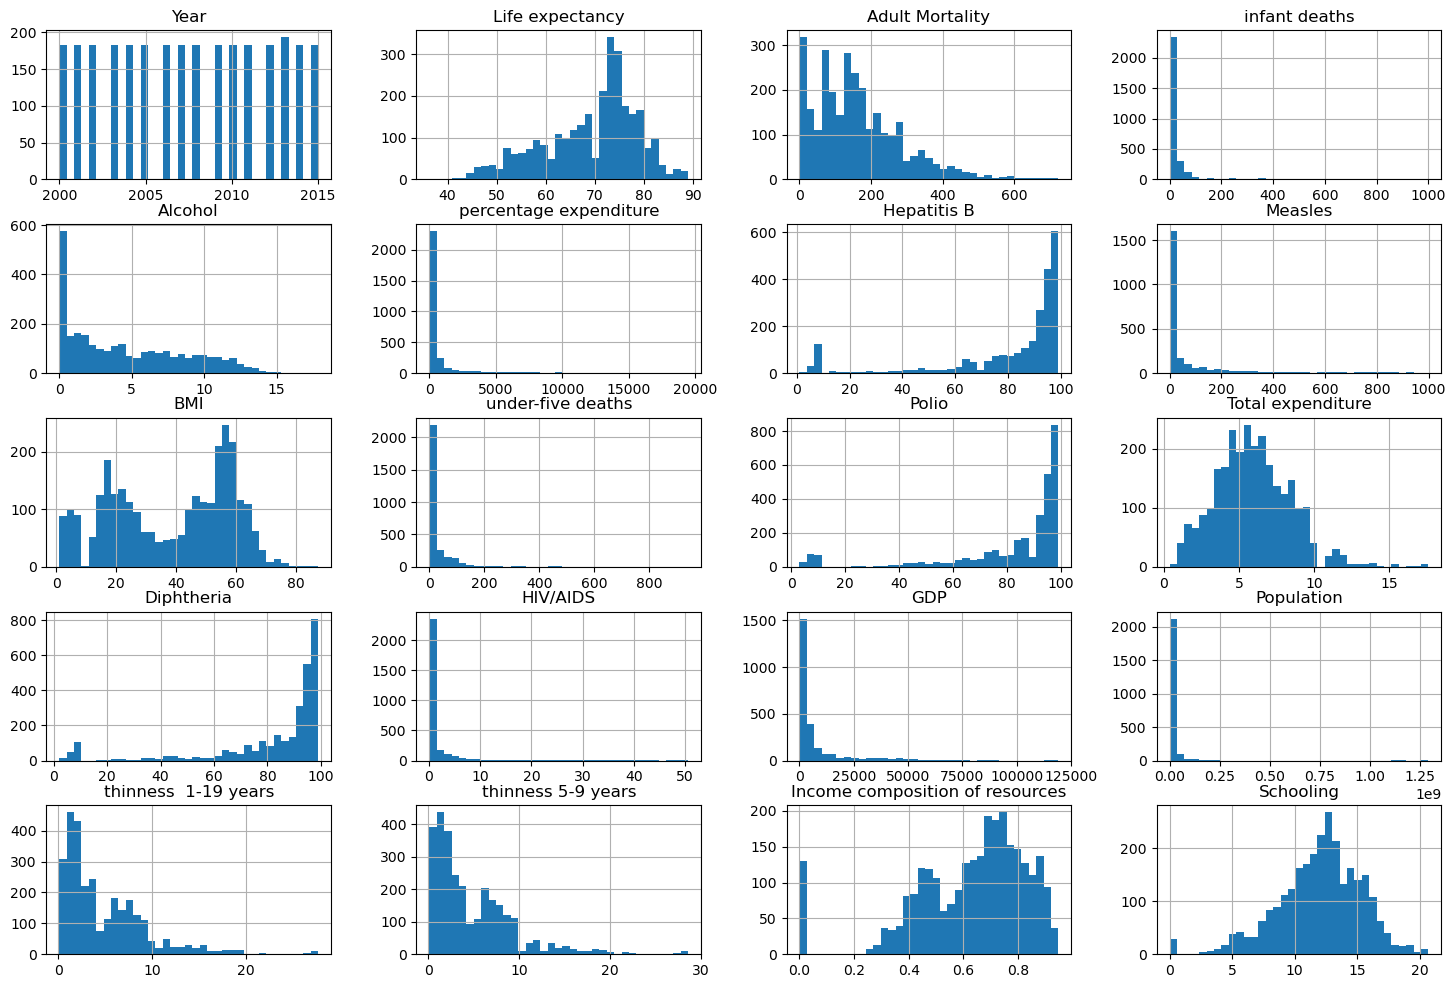

In [37]:
# Check the histograms
data.hist(bins=35, figsize=(18, 12))
plt.show()

In [38]:
num_cols = data.select_dtypes("number").columns # select all numeric types
print(f"There are {len(cols)} numeric columns: \n {cols}")

non_num_cols = data.select_dtypes(exclude=['int64', 'float64']).columns # select all numeric types
print(f"There are {len(non_num_cols)} non numeric columns: \n {non_num_cols}")

There are 3 numeric columns: 
 ['infant deaths', 'Measles', 'under-five deaths']
There are 2 non numeric columns: 
 Index(['Country', 'Status'], dtype='object')


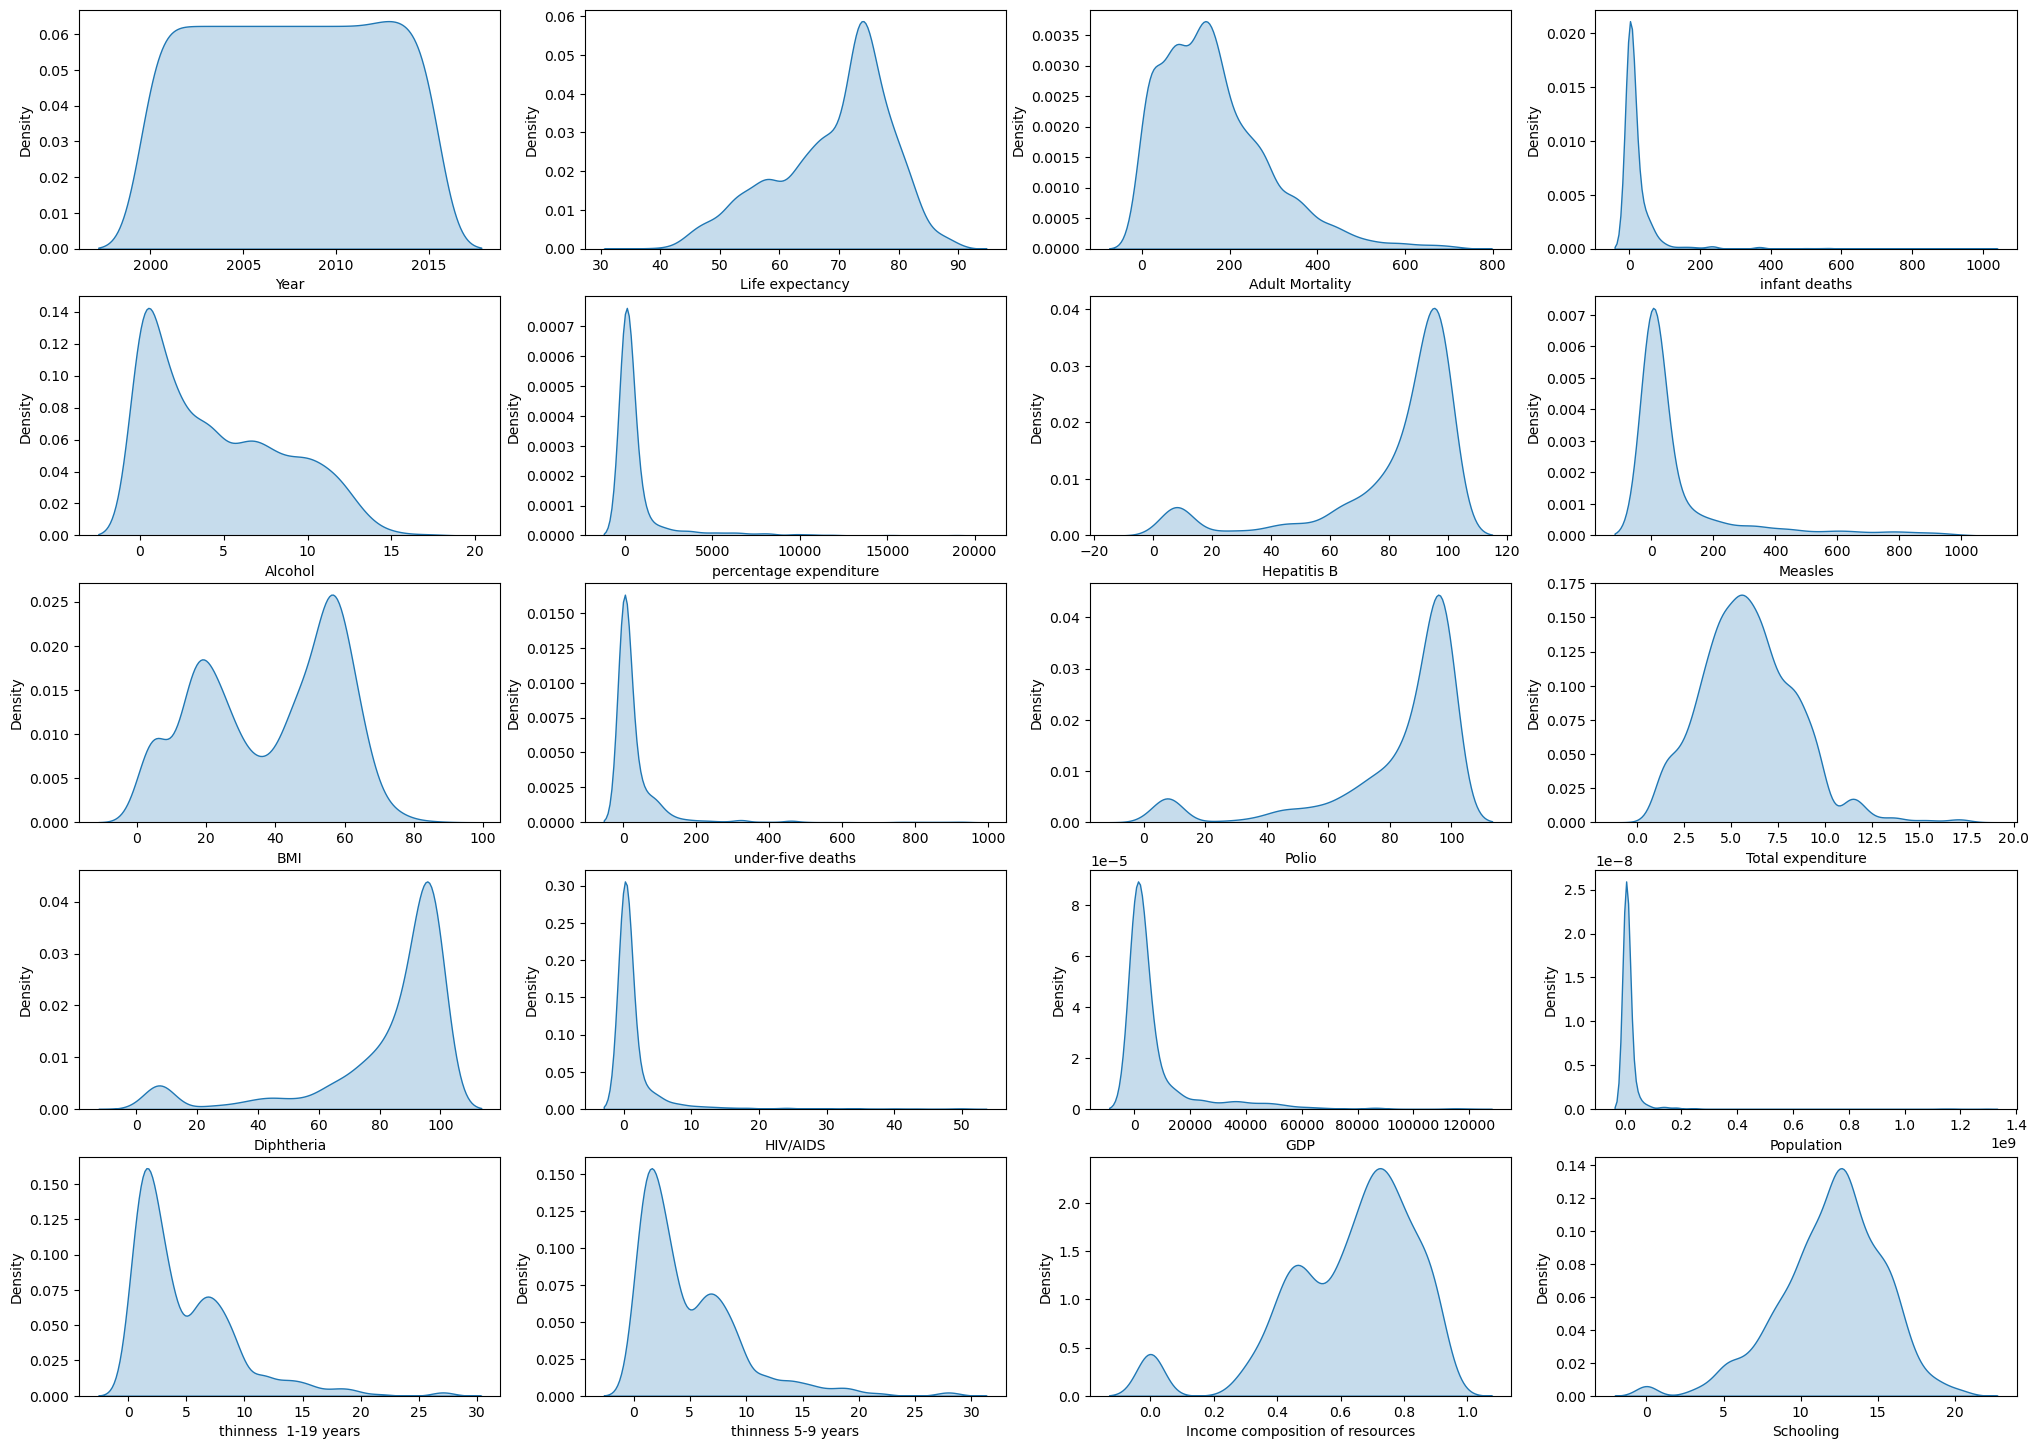

In [39]:
fig = plt.figure(figsize=(25,18))

graph_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, graph_index) # subplot(nrows, ncols, index)
    graph = sns.kdeplot(data = data, x = col, fill = True)
    graph_index += 1 # Set the position to the next one

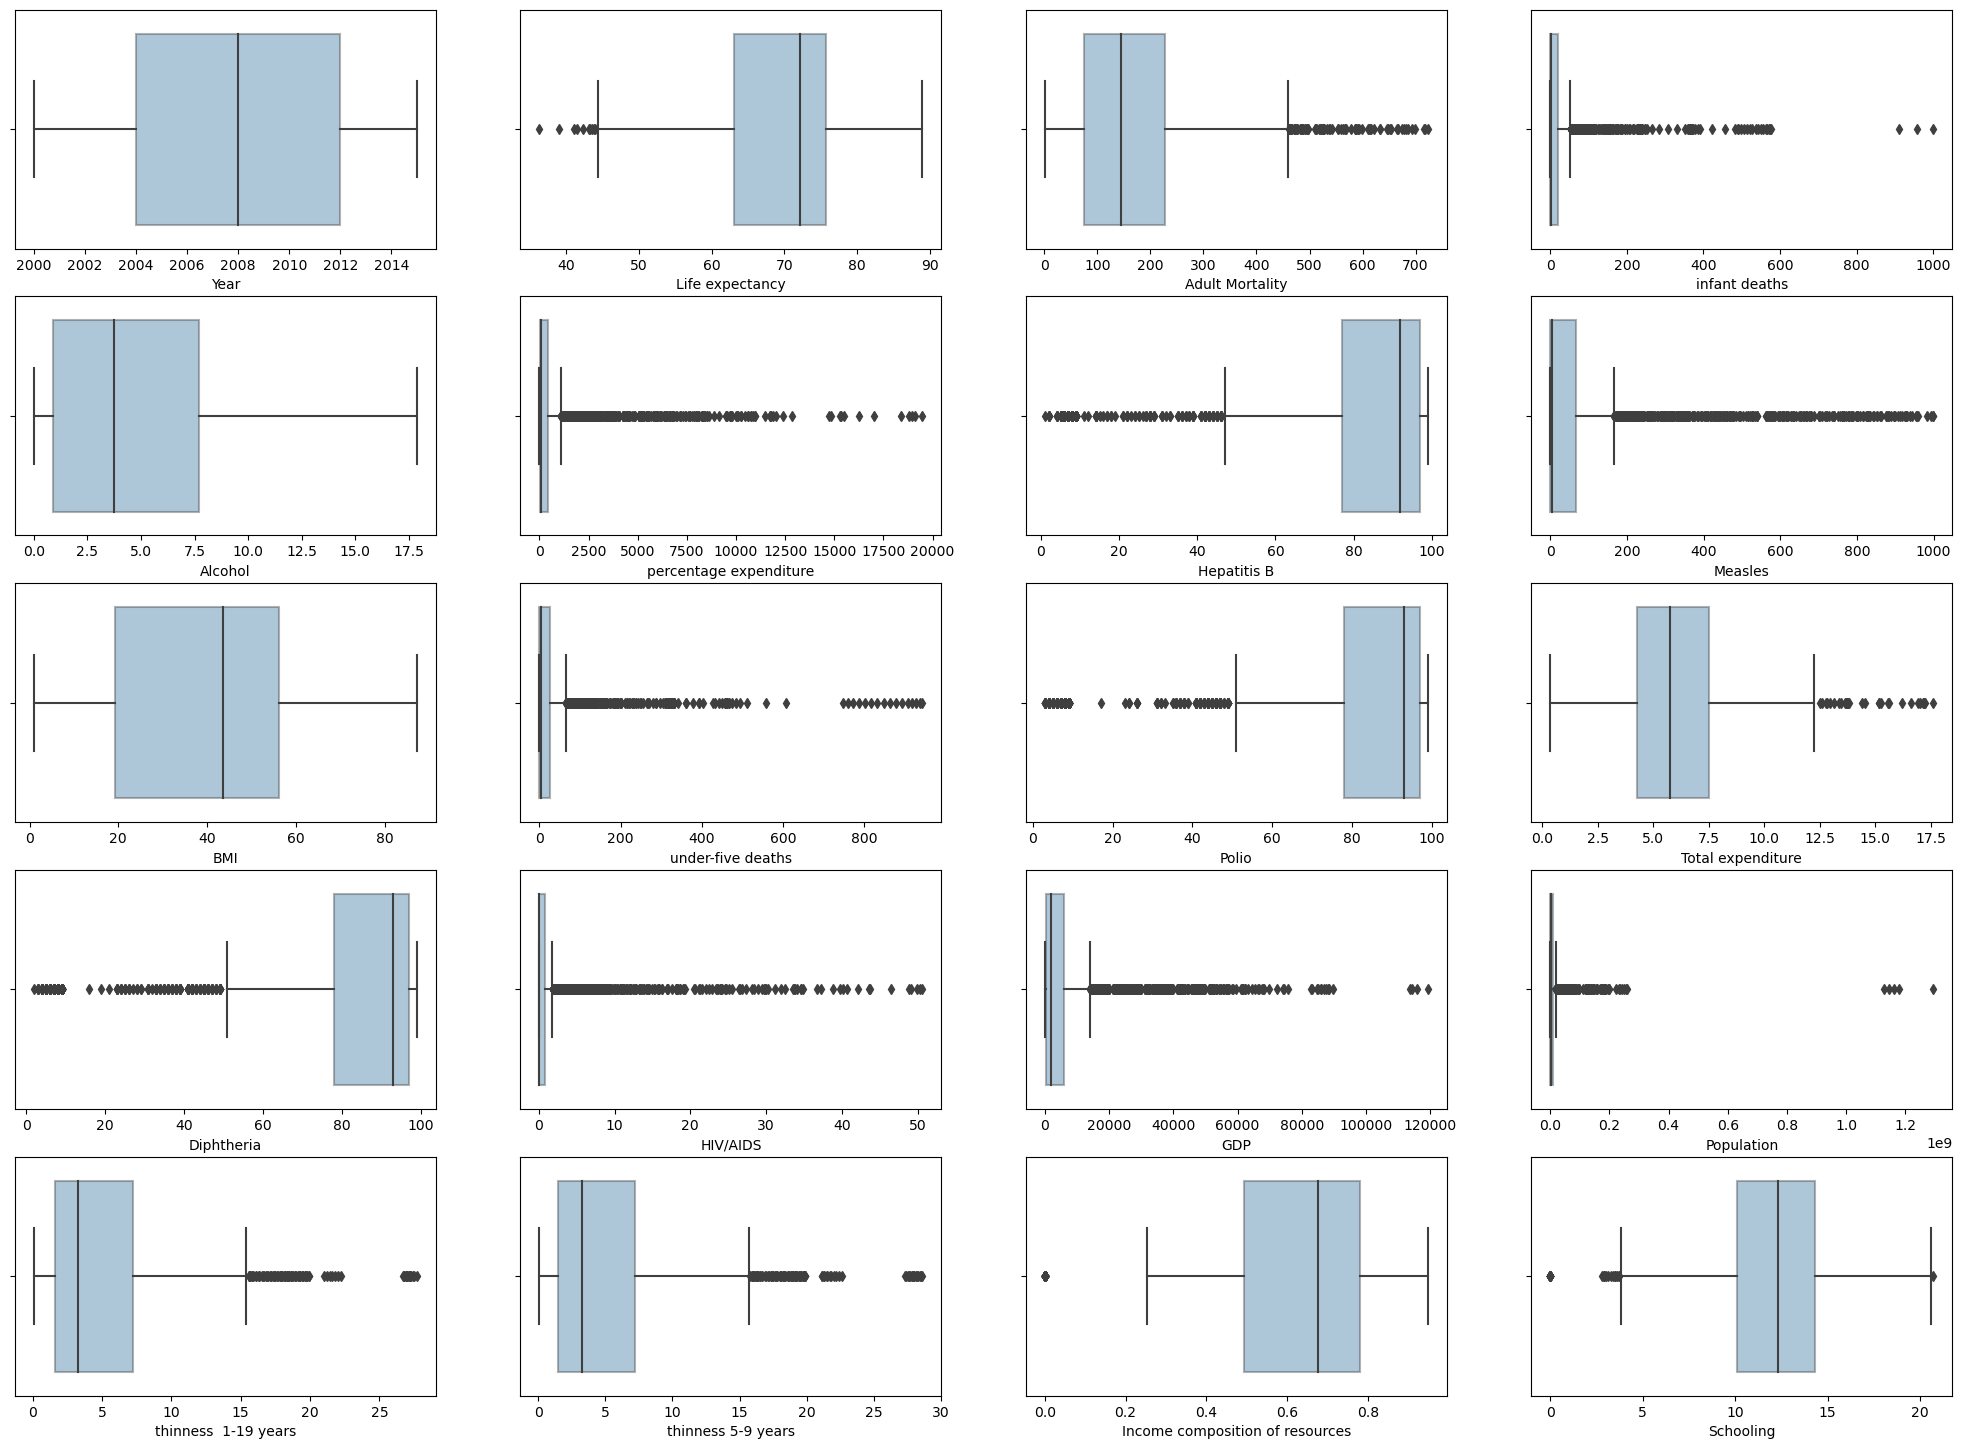

In [40]:
fig = plt.figure(figsize=(25,18))

boxplot_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, boxplot_index) # subplot(nrows, ncols, index)
    boxplot = sns.boxplot(data=data, x=col, boxprops=dict(alpha=0.4))  # Set alpha for transparency
    boxplot_index += 1 # Set the position to the next one

In [41]:
data.skew(axis = 0, skipna=True, numeric_only=True).sort_values(ascending=False) # Skewness in each numeric column with ascending order

Population                         15.916236
infant deaths                       6.703833
under-five deaths                   6.140508
HIV/AIDS                            5.396112
percentage expenditure              4.652051
GDP                                 3.206655
Measles                             2.737869
thinness 5-9 years                  1.777424
thinness  1-19 years                1.711471
Adult Mortality                     1.174369
Total expenditure                   0.618686
Alcohol                             0.589563
Year                               -0.006409
BMI                                -0.219312
Schooling                          -0.602437
Life expectancy                    -0.638605
Income composition of resources    -1.143763
Hepatitis B                        -1.930845
Diphtheria                         -2.072753
Polio                              -2.098053
dtype: float64

- **Positive** value: The distribution is skewed to the **right**.
- **Negative** value: The distribution is skewed to the **left**.
- **0**: **Perfect normal distribution**.

## Data Visualization

## Predictive Model

## Additional Topic: Scikit-learn Pipeline (ToDo: Check it out)
__[Pipeline Intro](https://www.freecodecamp.org/news/machine-learning-pipeline/)__
- https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4

**Notebook Referencing:**
- https://www.kaggle.com/code/mo7amedali/life-expectancy-modeling